In [1]:
import tensorflow as tf

In [7]:
import numpy as np
from tensorflow import keras

In [8]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
(x_train,y_train) , (x_test, y_test)  = keras.datasets.mnist.load_data() 

11493376/11490434 [==============================] - 3s 0us/step


In [11]:
len(x_train)

60000

In [12]:
len(y_train)

60000

In [13]:
len(x_test)

10000

In [14]:
x_train[0].shape

(28, 28)

In [15]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

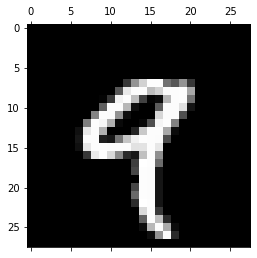

In [19]:
plt.matshow(x_train[4], cmap  = "gray")

In [20]:
y_train[4]

9

In [33]:
x_train_flatten = (x_train.reshape(len(x_train),28*28))/255


In [34]:
x_train_test = x_test.reshape(len(x_test),28*28)

In [35]:
model = keras.Sequential([keras.layers.Dense(10,input_shape= (784,),activation = 'sigmoid')])
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train_flatten,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4714 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2671 - accuracy: 0.9251


In [72]:
model.evaluate(x_train_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 48.1802 - accuracy: 0.9124


[48.18016052246094, 0.9124000072479248]

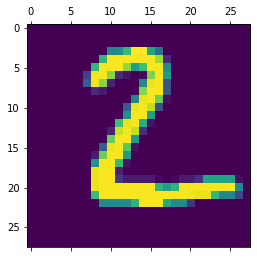

In [73]:
plt.matshow(x_test[1])

In [74]:
y_predict = model.predict(x_train_test)
y_predict[1]

array([9.77414762e-27, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       1.42867495e-36, 0.00000000e+00], dtype=float32)

In [75]:
np.argmax(y_predict[0])

3

In [76]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[3, 2, 1, 0, 4]

In [77]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [78]:
cm = tf.math.confusion_matrix(y_test,y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    0,    1,    0,    1,    1,    0,    3,    0],
       [   0, 1122,    4,    1,    1,    2,    2,    0,    3,    0],
       [  59,   96,  840,    5,    9,    0,    5,    2,   14,    2],
       [  33,    4,  193,  767,    1,    5,    0,    2,    5,    0],
       [  10,    4,   12,   11,  934,    0,    4,    0,    7,    0],
       [  59,    7,   33,  258,   31,  475,    8,    0,   20,    1],
       [  71,    3,  256,    2,   67,   44,  514,    0,    1,    0],
       [  21,   21,   76,  361,   62,    4,    0,  479,    4,    0],
       [  17,   34,   95,  178,   26,   77,   22,    8,  516,    1],
       [  12,   11,    5,   93,  515,    5,    0,  177,  106,   85]])>

In [79]:
a = np.array([1,2,3])
np.argmin(a)

0

<AxesSubplot:>

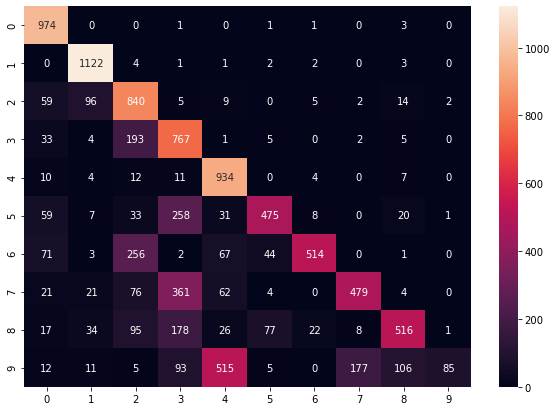

In [80]:
import seaborn as sns
plt.figure(figsize  =(10,7))
sns.heatmap(cm, annot = True, fmt = 'd')

In [81]:
model = keras.Sequential([keras.layers.Dense(100,input_shape= (784,),activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')
                         ])
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train_flatten,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2730 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1234 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0862 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0666 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9843


In [83]:
model.evaluate(x_train_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 12.7680 - accuracy: 0.9766


[12.768037796020508, 0.9765999913215637]

In [84]:
y_predict = model.predict(x_train_test)
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[3, 1, 1, 0, 4]

In [85]:
cm = tf.math.confusion_matrix(y_test,y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    1,    0,    0,    0,    0,    0,    0,    1,    0],
       [   5, 1129,    0,    0,    0,    1,    0,    0,    0,    0],
       [  61,  427,  542,    0,    0,    0,    0,    1,    1,    0],
       [   4,   69,  145,  790,    0,    0,    0,    0,    1,    1],
       [  27,    6,   77,   25,  844,    0,    0,    3,    0,    0],
       [  37,   12,    8,  355,    5,  475,    0,    0,    0,    0],
       [ 213,   28,  181,    3,  145,  181,  207,    0,    0,    0],
       [  22,   74,  284,  265,   15,    6,    3,  359,    0,    0],
       [ 119,   23,  229,  193,   24,   47,   28,   13,  298,    0],
       [  20,    8,    7,  135,  270,   15,    1,  188,   39,  326]])>

<AxesSubplot:>

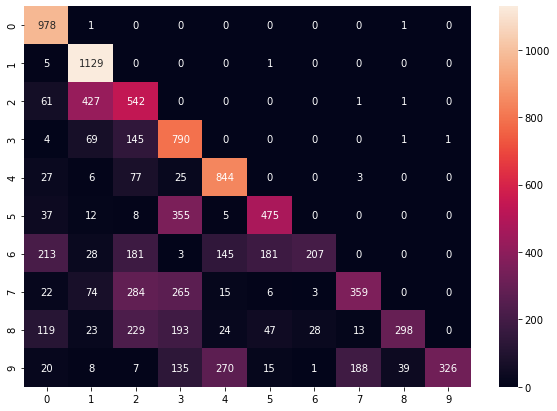

In [86]:
import seaborn as sns
plt.figure(figsize  =(10,7))
sns.heatmap(cm, annot = True, fmt = 'd')